# **Import Data**

Data ini merupakan data cuaca harian sulawesi tenggara, mulai dari tanggal 01 januari 2022 sampai dengan 20 desember 2023, dimana data-data dibawah ini meliputi:
Thn,bln,tgl.
temp_min: Temperatur minimum (°C)
temp_max: Temperatur maksimum (°C)
temp_rata-rata: Temperatur rata-rata (°C)
lembab_rata-rata: Kelembapan rata-rata (%)
ch: Curah hujan (mm)
cahaya_jam: Lamanya penyinaran matahari (jam).
sumber data:https://www.kaggle.com/datasets/ratnasarii/prediksi-cuaca

In [ ]:
# import multivariat dataset
import pandas as pd
df_cuaca = pd.read_csv('https://raw.githubusercontent.com/AgustioeF/UAS-ADE/main/data_cuaca.csv', delimiter=";")
# + 1 index agar sesuai urutan
df_cuaca.index = df_cuaca.index + 1

In [ ]:
# menampilkan 100 data
df_cuaca.head(100)

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
1,2022,1,1,24.0,32.2,27.0,84.0,1.0,3.5
2,2022,1,2,24.0,31.2,25.8,91.0,8.1,2.5
3,2022,1,3,22.4,32.0,26.3,86.0,29.3,2.0
4,2022,1,4,24.0,29.8,26.7,87.0,0.5,5.5
5,2022,1,5,23.4,32.2,26.9,85.0,22.3,0.0
...,...,...,...,...,...,...,...,...,...
96,2022,4,6,23.4,32.4,27.5,82.0,0.0,6.1
97,2022,4,7,23.4,32.6,27.8,82.0,1.0,7.1
98,2022,4,8,23.8,33.0,27.9,81.0,5.0,5.5
99,2022,4,9,24.6,33.0,28.2,80.0,0.0,7.4


In [ ]:
# deskripsi tipe data
df_cuaca.dtypes

Thn                   int64
bln                   int64
tgl                   int64
temp_min            float64
temp_max            float64
temp_rata-rata      float64
lembab_rata-rata    float64
ch                  float64
cahaya_jam          float64
dtype: object

In [ ]:
# cek kolom data
df_cuaca.columns

Index(['Thn', 'bln', 'tgl', 'temp_min', 'temp_max', 'temp_rata-rata',
       'lembab_rata-rata', 'ch', 'cahaya_jam'],
      dtype='object')

# **Pre-Processing data sebelum interpolasi**

In [ ]:
#melihat jumlah data yang hilang
total = df_cuaca.isnull().sum().sort_values(ascending=False)
total

temp_max            4
temp_rata-rata      3
lembab_rata-rata    3
ch                  3
cahaya_jam          2
temp_min            1
Thn                 0
bln                 0
tgl                 0
dtype: int64

In [ ]:
# melihat di index berapa data yang hilang
total2 = df_cuaca[df_cuaca.isnull().any(axis=1)]
total2

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
39,2022,2,8,24.0,NaN,26.2,90.0,2.0,2.0
296,2022,10,23,25.0,34.4,28.4,82.0,NaN,7.0
308,2022,11,4,24.4,33.3,29.1,81.0,NaN,9.1
391,2023,1,26,24.2,NaN,27.8,82.0,3.4,3.0
437,2023,3,13,23.8,32.0,NaN,NaN,6.2,6.3
586,2023,8,9,22.4,31.2,25.6,88.0,0.8,NaN
659,2023,10,21,20.2,35.2,NaN,NaN,0.0,8.7
661,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN
709,2023,12,10,23.4,NaN,27.9,85.0,28.8,2.3


In [ ]:
# menemukan indeksnya
missing_indices = df_cuaca[df_cuaca.isnull().any(axis=1)].index
print("\nIndeks baris dengan missing values:")
print(missing_indices.tolist())


Indeks baris dengan missing values:
[39, 296, 308, 391, 437, 586, 659, 661, 709]


In [ ]:
# mengisi data dengan interpolasi
df_cuaca_interpolated = df_cuaca.interpolate(method='linear')
print("\nDataFrame setelah interpolasi:")
print(df_cuaca_interpolated.head())


DataFrame setelah interpolasi:
    Thn  bln  tgl  temp_min  temp_max  temp_rata-rata  lembab_rata-rata    ch  \
1  2022    1    1      24.0      32.2            27.0              84.0   1.0   
2  2022    1    2      24.0      31.2            25.8              91.0   8.1   
3  2022    1    3      22.4      32.0            26.3              86.0  29.3   
4  2022    1    4      24.0      29.8            26.7              87.0   0.5   
5  2022    1    5      23.4      32.2            26.9              85.0  22.3   

   cahaya_jam  
1         3.5  
2         2.5  
3         2.0  
4         5.5  
5         0.0  


# **Pre-Processing data setelah interpolasi**

In [ ]:
# cek kembali missing value
total3 = df_cuaca_interpolated.isnull().sum().sort_values(ascending=False)
total3

Thn                 0
bln                 0
tgl                 0
temp_min            0
temp_max            0
temp_rata-rata      0
lembab_rata-rata    0
ch                  0
cahaya_jam          0
dtype: int64

In [ ]:
# Hitung mean
print("rata-rata:", df_cuaca_interpolated['temp_rata-rata'].mean())


rata-rata: 27.20945757997218


In [ ]:
# hitung median
print("median:", df_cuaca_interpolated['temp_rata-rata'].median())


median: 27.0


In [ ]:
# hitung modus
print("modus:", df_cuaca_interpolated['temp_rata-rata'].mode())


modus: 0    26.0
1    26.5
Name: temp_rata-rata, dtype: float64


In [ ]:
# hitung standar deviasi
std_temp=(df_cuaca_interpolated['temp_rata-rata'].std())
print("standar deviasi:", std_temp)

standar deviasi: 1.457867279083002


In [ ]:
# hitung varians
print("varians:", df_cuaca_interpolated['temp_rata-rata'].var())


varians: 2.125377003420876


In [ ]:
#menghitung kemiringan
print("Kemiringan: ", df_cuaca_interpolated['temp_rata-rata'].skew())

Kemiringan:  1.089524482436728


In [ ]:
#menghitung kurtosis
print("Kurtosis: ", df_cuaca_interpolated['temp_rata-rata'].kurt())

Kurtosis:  2.3496779801886882


In [ ]:
#menghitung nilai outlier
temp = df_cuaca_interpolated['temp_rata-rata']
prs = np.percentile(temp,50)
print("Q2=",prs)
prs2 = np.percentile(temp,25)
print("Q1=",prs2)
prs3 = np.percentile(temp,75)
print("Q3=",prs3)
IQR=prs3-prs2
print("IQR",IQR)


Q2= 27.0
Q1= 26.3
Q3= 27.9
IQR 1.5999999999999979


In [ ]:
#Menghitung nilai Error
import math
akar_n = math.sqrt(719)
error = std_temp/akar_n
print("Error dari temp_rata-rata ", error)

Error dari temp_rata-rata  0.054369275196800425


# **Visualisasi Data**

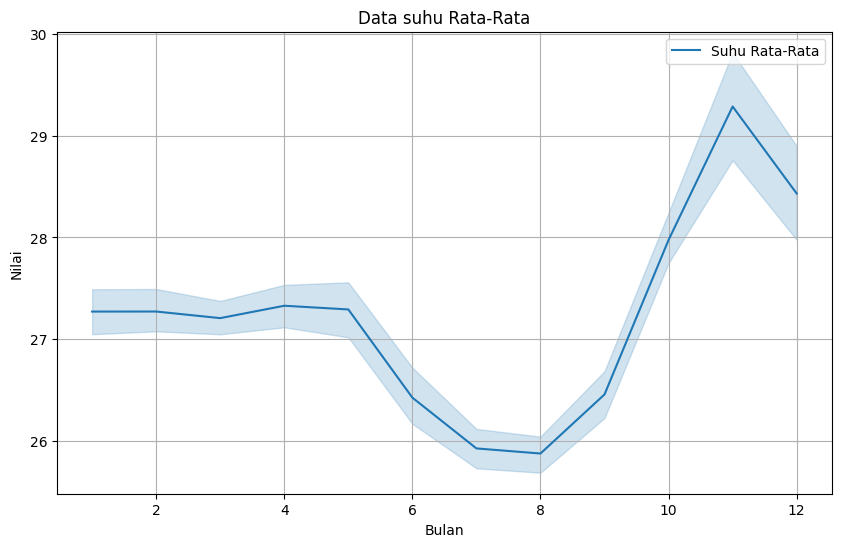

In [ ]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

# pilih kolom yang relavan
date = df_cuaca_interpolated['bln']
temp_rata_rata = df_cuaca_interpolated['temp_rata-rata']

# membuat garis plot untuk temp
plt.figure(figsize=(10, 6))

sns.lineplot(x=date, y=temp_rata_rata, label='Suhu Rata-Rata')

plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Data suhu Rata-Rata')

plt.legend()
plt.grid(True)

plt.show()


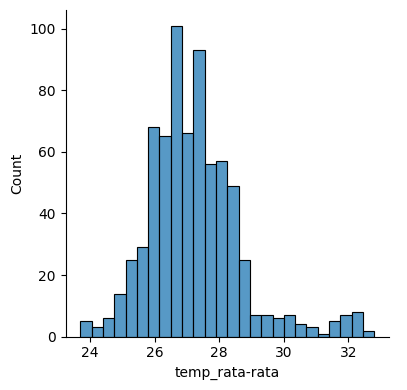

In [ ]:
g = sns.FacetGrid(df_cuaca_interpolated, height=4)
g.map(sns.histplot, "temp_rata-rata").add_legend()

plt.show()

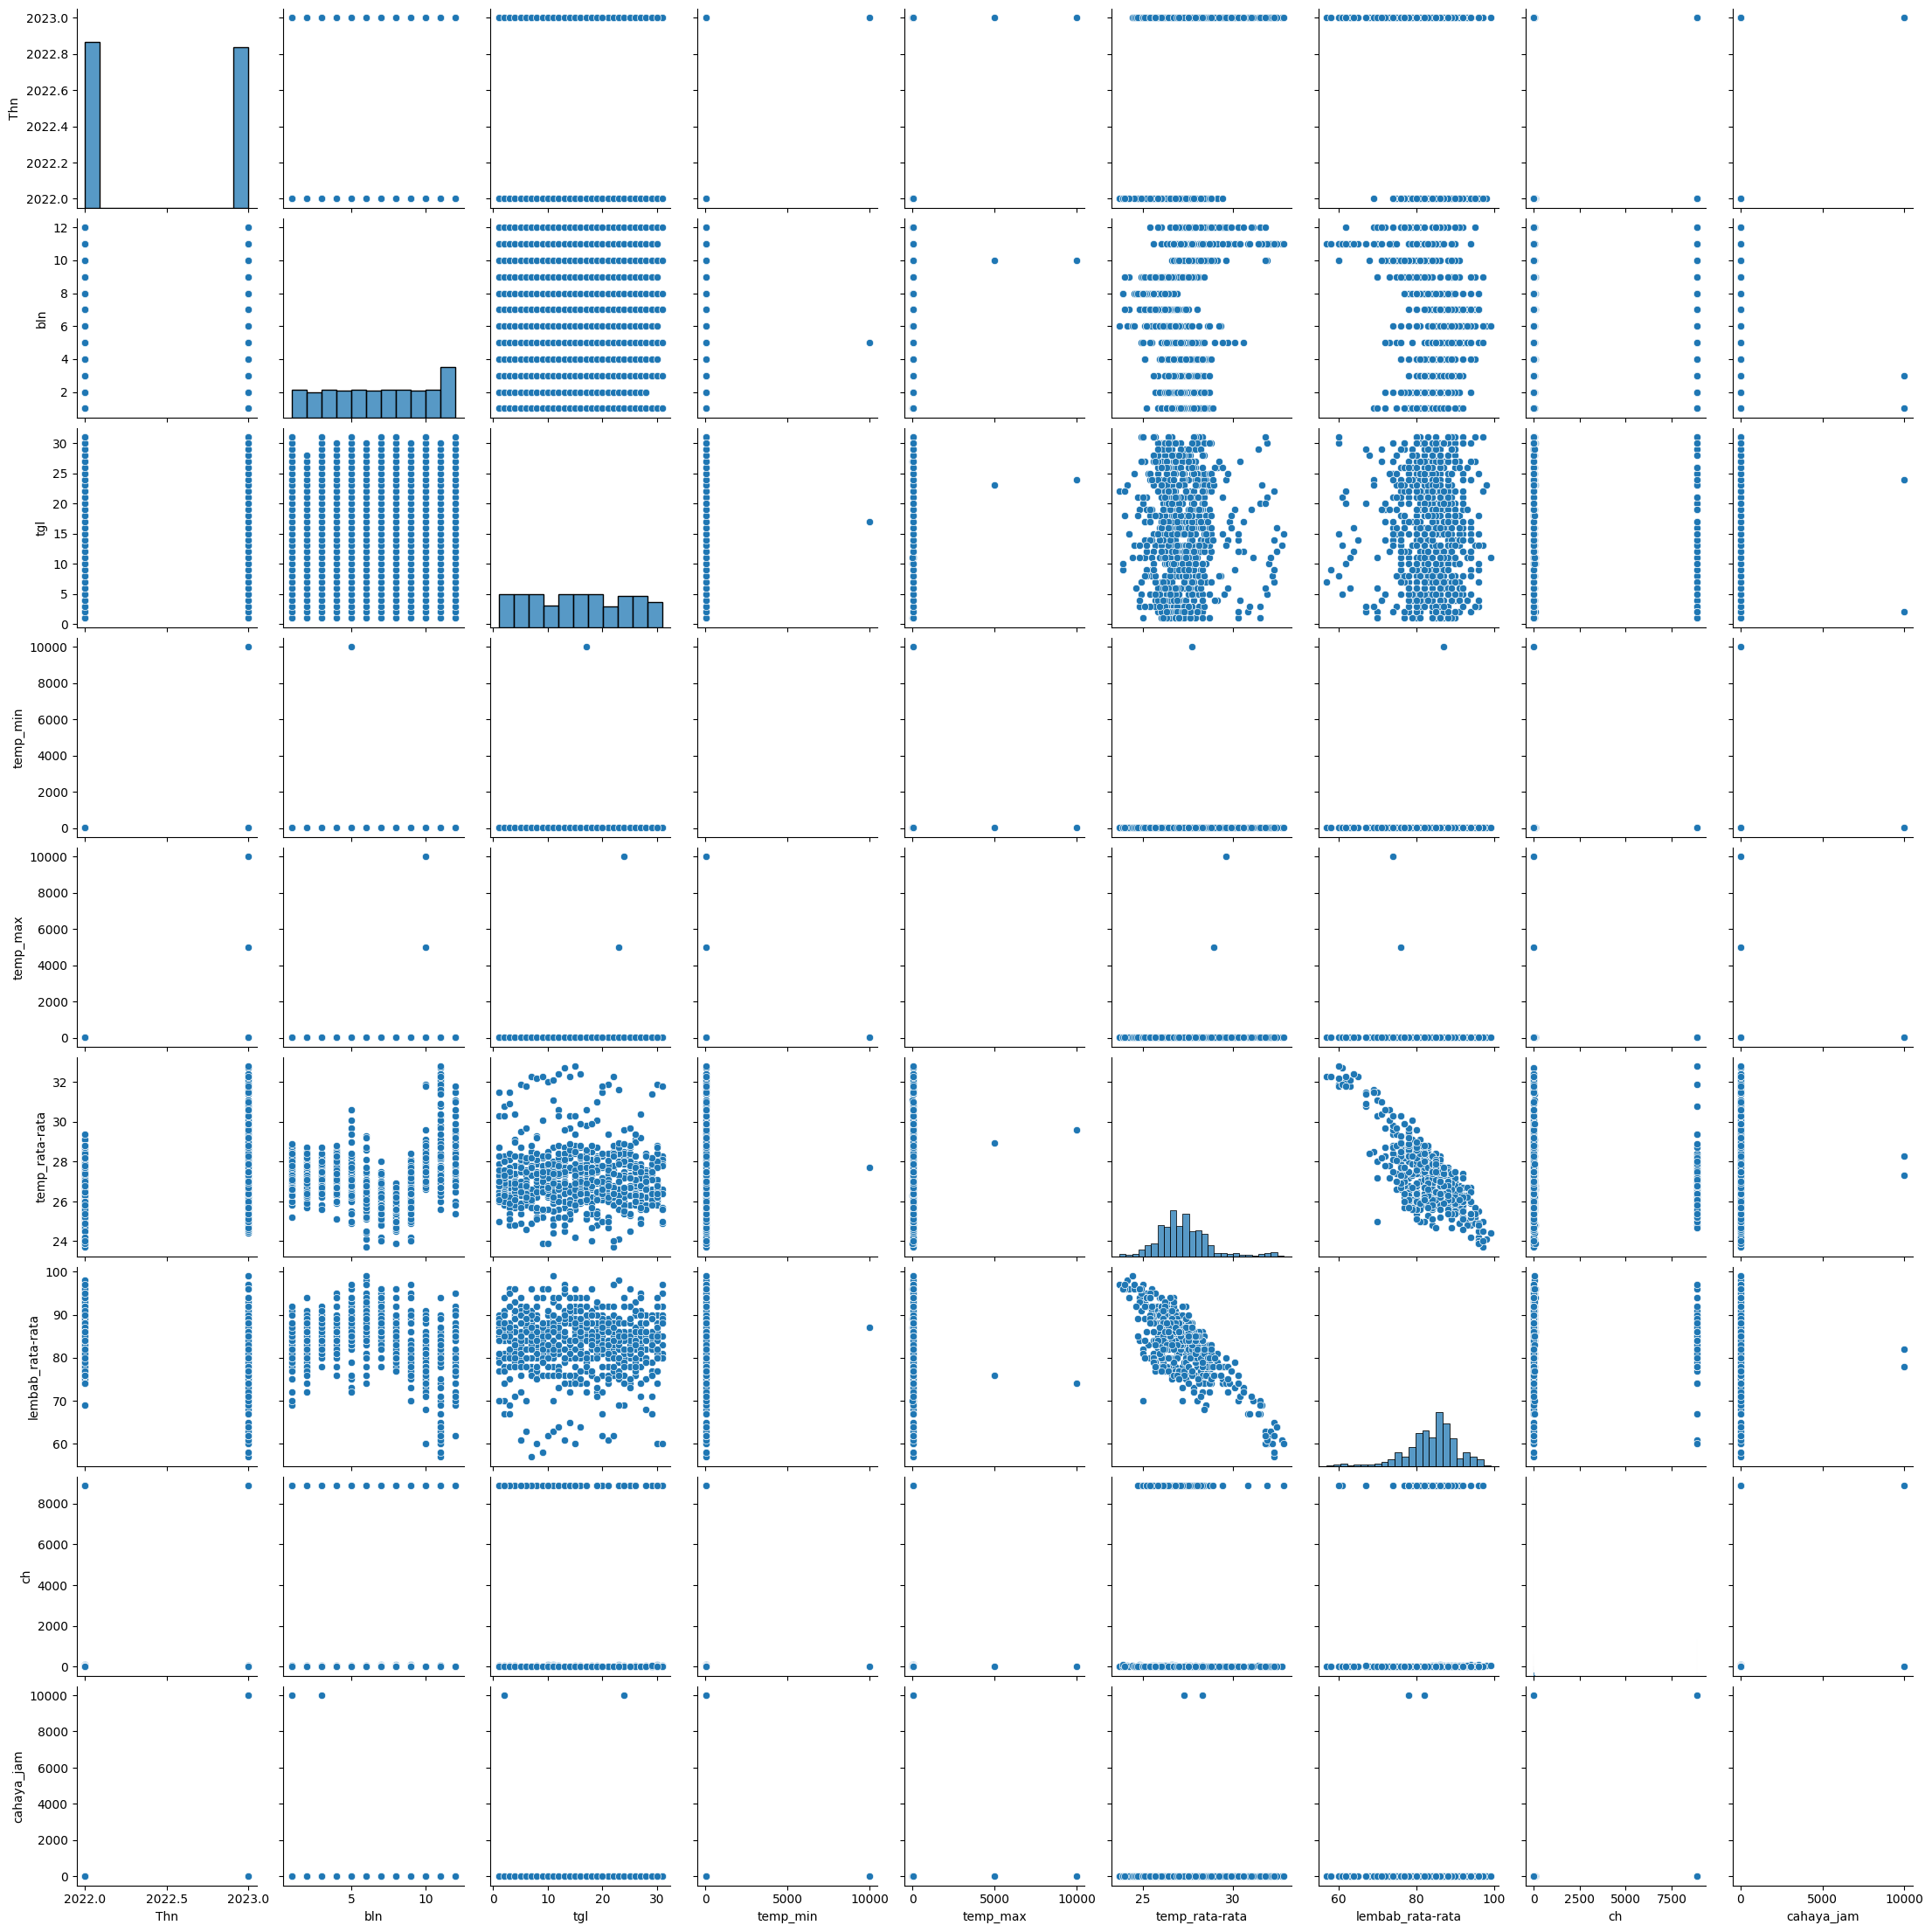

In [ ]:
# plot data cuaca tiap varians
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_cuaca_interpolated)

Text(5.069444444444445, 0.5, 'hari/tanggal')

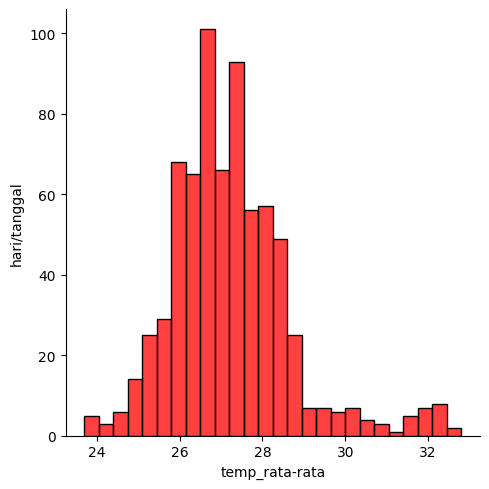

In [ ]:
# plot rata-rata temperatur harian
sns.displot(df_cuaca_interpolated['temp_rata-rata'], color='r')
plt.ylabel('hari/tanggal')

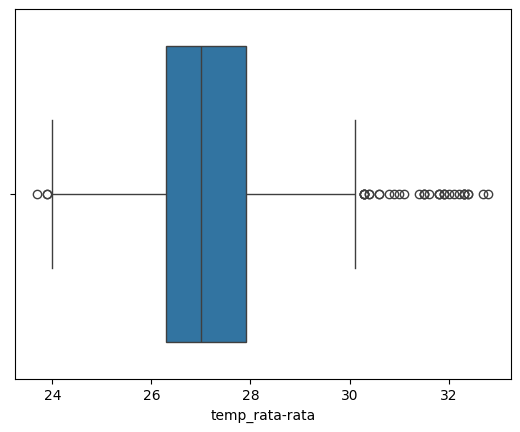

In [ ]:
sns.boxplot(x="temp_rata-rata", data=df_cuaca_interpolated)
plt.show()

Text(0, 0.5, 'tgl')

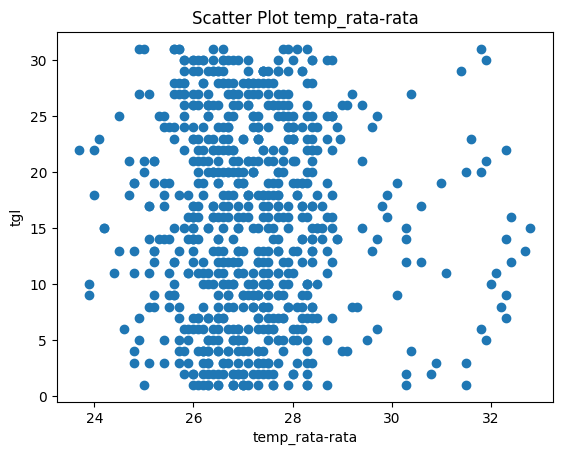

In [ ]:
plt.scatter(df_cuaca_interpolated["temp_rata-rata"], df_cuaca_interpolated["tgl"])
plt.title("Scatter Plot temp_rata-rata")
plt.xlabel("temp_rata-rata")
plt.ylabel("tgl")

# **Uji Hipotesis Z-TEST**

**Soal Uji Hipotesis**

Persoalan:
seorang peneliti cuaca yang ingin mengetahui apakah rata-rata suhu harian di suatu kota berbeda dari 27°C dengan tingkat signifikansi 5% (a=0.05)? peneliti memiliki data suhu harian selama beberapa bulan, yang diambil dari link data: https://www.kaggle.com/datasets/ratnasarii/prediksi-cuaca

referensi berita: https://www.kompas.com/sains/read/2023/10/17/080000323/suhu-dan-kelembapan-udara-jadi-aspek-penting-perawatan-arsip-kertas


Hasil Uji Hipotesis:
Rata-rata sampel: 27.20945757997218
Standar deviasi sampel: 1.457867279083002
Ukuran sampel: 719
Nilai z hitung: 3.8524990302704514
Nilai z kritis: 1.959963984540054
Keputusan: Tolak H0 (Rata-rata suhu harian berbeda dari 27°C)


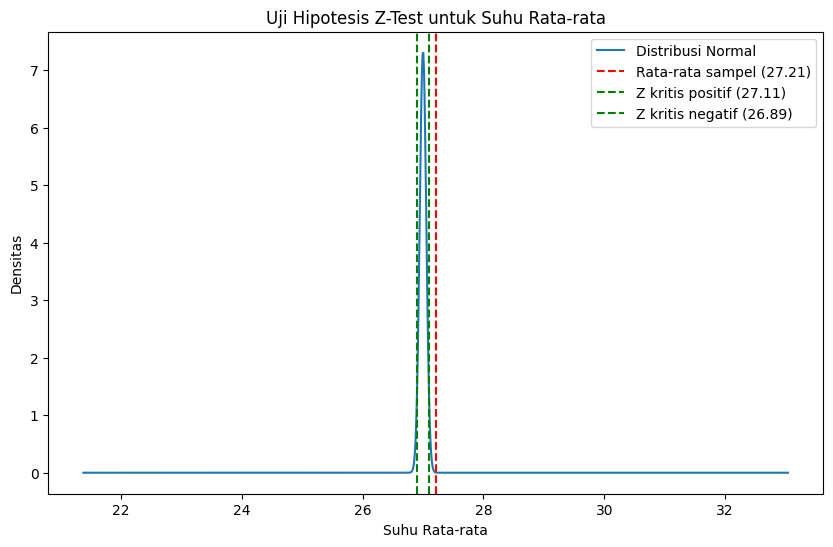

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


temperature_data = df_cuaca_interpolated['temp_rata-rata']

# Menghitung rata-rata dan standar deviasi sampel
mean_sample = temperature_data.mean()
std_sample = temperature_data.std(ddof=1)
n = len(temperature_data)

# Hipotesis nilai rata-rata populasi
mu = 27

# Menghitung nilai z hitung
z_statistic = (mean_sample - mu) / (std_sample / np.sqrt(n))

# Menentukan nilai z kritis untuk tingkat signifikansi 0.05 (dua sisi)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)  # dua sisi, jadi alpha/2

# Menampilkan hasil
print("\nHasil Uji Hipotesis:")
print(f"Rata-rata sampel: {mean_sample}")
print(f"Standar deviasi sampel: {std_sample}")
print(f"Ukuran sampel: {n}")
print(f"Nilai z hitung: {z_statistic}")
print(f"Nilai z kritis: {z_critical}")

# Keputusan uji
if abs(z_statistic) > z_critical:
    print("Keputusan: Tolak H0 (Rata-rata suhu harian berbeda dari 27°C)")
else:
    print("Keputusan: Gagal menolak H0 (Tidak ada bukti cukup bahwa rata-rata suhu harian berbeda dari 27°C)")

# Visualisasi hasil uji hipotesis
x = np.linspace(mean_sample - 4*std_sample, mean_sample + 4*std_sample, 1000)
y = stats.norm.pdf(x, mu, std_sample / np.sqrt(n))

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribusi Normal')
plt.axvline(mean_sample, color='r', linestyle='--', label=f'Rata-rata sampel ({mean_sample:.2f})')
plt.axvline(mu + z_critical * (std_sample / np.sqrt(n)), color='g', linestyle='--', label=f'Z kritis positif ({mu + z_critical * (std_sample / np.sqrt(n)):.2f})')
plt.axvline(mu - z_critical * (std_sample / np.sqrt(n)), color='g', linestyle='--', label=f'Z kritis negatif ({mu - z_critical * (std_sample / np.sqrt(n)):.2f})')
plt.title('Uji Hipotesis Z-Test untuk Suhu Rata-rata')
plt.xlabel('Suhu Rata-rata')
plt.ylabel('Densitas')
plt.legend()
plt.show()
